In [6]:
%pip install opencv-python

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Базовая работа с изображением

In [8]:
image = cv2.imread('sar_2_color.jpg')

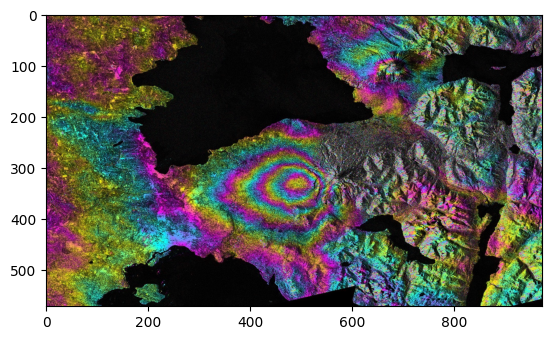

In [9]:
plt.imshow(image)

In [10]:
image.shape # h,w,c

(572, 974, 3)

In [11]:
image[250,250] # b,g,r

array([12, 12, 12], dtype=uint8)

In [12]:
# ROI
img_roi = image[100:200, 500:700]

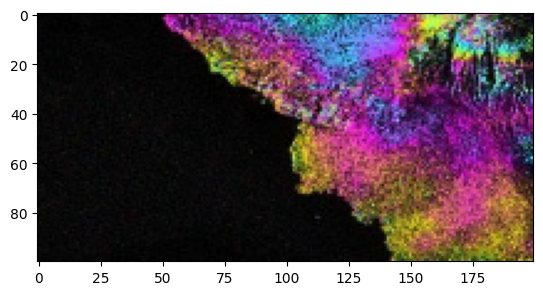

In [13]:
plt.imshow(img_roi)

In [14]:
b,g,r = cv2.split(image)

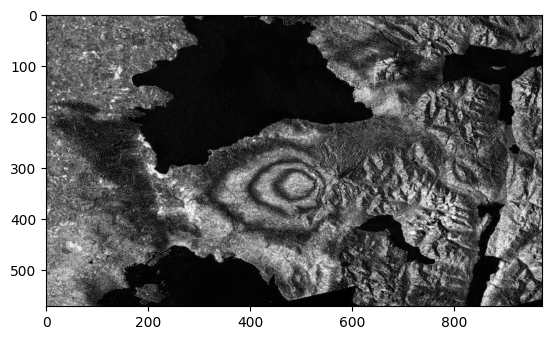

In [15]:
plt.imshow(b, cmap = 'gray')

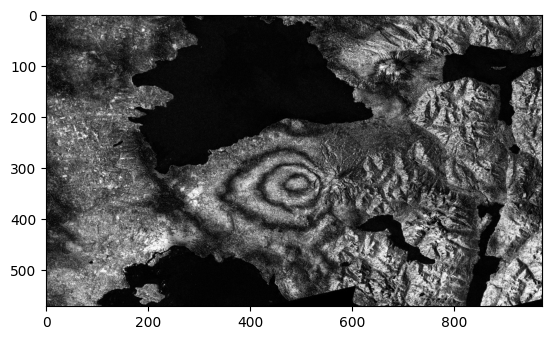

In [16]:
plt.imshow(g, cmap = 'gray')

In [17]:
# alternative approach
b = image[:,:,0]

In [18]:
import copy

image2 = copy.deepcopy(image)

In [19]:
image2[50:100,50:100] = [0,0,0]

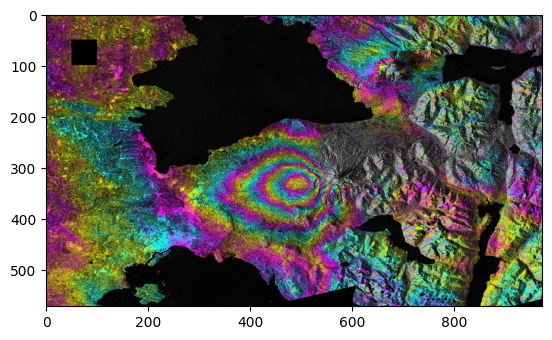

In [20]:
plt.imshow(image2)

In [21]:
# empty image
image_template = np.zeros(image.shape,np.uint8)

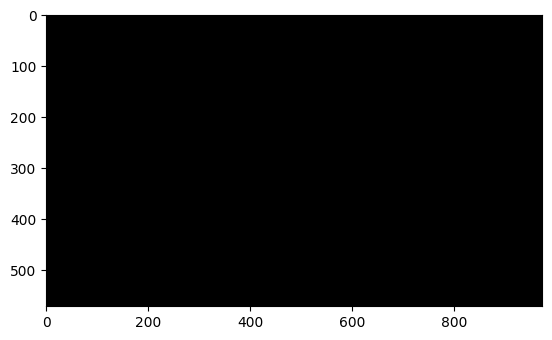

In [22]:
plt.imshow(image_template)

# Конвертация цветовых моделей

In [23]:
image_template[0,0]

array([0, 0, 0], dtype=uint8)

In [24]:
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 

In [25]:
image_gray[0,0]

np.uint8(40)

In [26]:
image_gray.shape

(572, 974)

In [27]:
image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV) 

In [28]:
image_hsv.shape

(572, 974, 3)

In [29]:
image_hsv[0,0]

array([117, 143,  75], dtype=uint8)

In [30]:
image[0,0]

array([75, 37, 33], dtype=uint8)

In [31]:
image_lab = cv2.cvtColor(image, cv2.COLOR_BGR2Lab)

In [32]:
image_lab[0,0]

array([ 42, 139, 104], dtype=uint8)

# Пороговая фильтрация

In [33]:
_,thresh1 = cv2.threshold(image_gray,200,255,cv2.THRESH_BINARY)

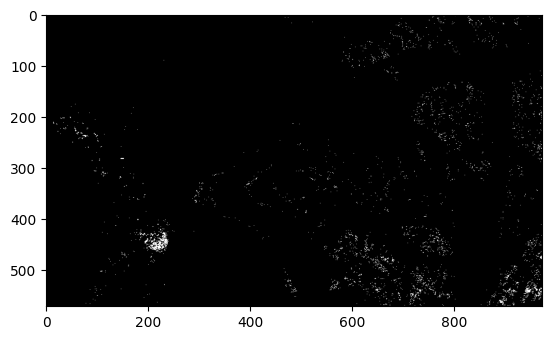

In [34]:
plt.imshow(thresh1, cmap='gray')

In [35]:
thresh1[thresh1==100].sum()

np.uint64(0)

# Построение гистограммы

In [36]:
histSize = 256
histRange = (0, 256)
accumulate = False

b_hist = cv2.calcHist([b], [0], None, [histSize], histRange, accumulate=accumulate)

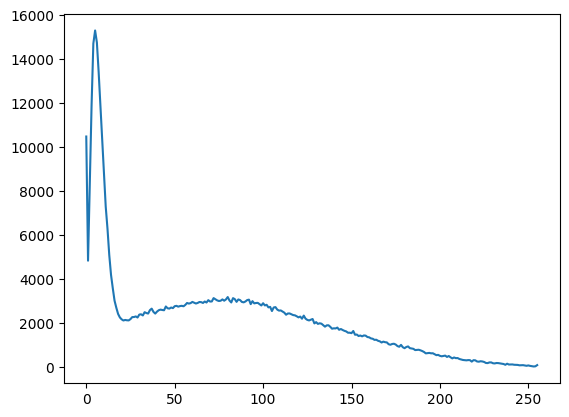

In [37]:
plt.plot(b_hist)

In [38]:
b_hist_cum = b_hist.cumsum()

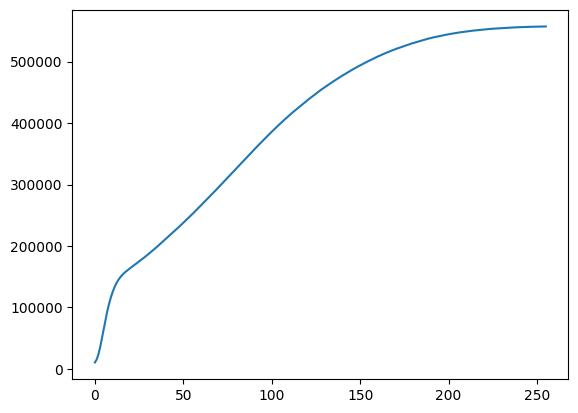

In [39]:
plt.plot(b_hist_cum)

In [40]:
b_hist_norm = b_hist /  (image.shape[0] * image.shape[1])

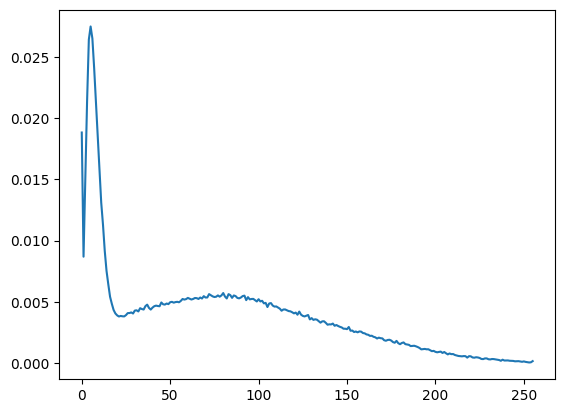

In [41]:
plt.plot(b_hist_norm)

# Сравнение двух изображений

In [42]:
%pip install scikit-image

                                              0.0/12.8 MB ? eta -:--:--
                                              0.0/12.8 MB 1.4 MB/s eta 0:00:10
                                              0.1/12.8 MB 1.1 MB/s eta 0:00:13
                                              0.2/12.8 MB 1.2 MB/s eta 0:00:11
                                              0.3/12.8 MB 1.7 MB/s eta 0:00:08
     -                                        0.5/12.8 MB 2.2 MB/s eta 0:00:06
     --                                       0.7/12.8 MB 2.4 MB/s eta 0:00:06
     --                                       0.8/12.8 MB 2.7 MB/s eta 0:00:05
     ---                                      1.1/12.8 MB 2.9 MB/s eta 0:00:05
     ---                                      1.1/12.8 MB 2.9 MB/s eta 0:00:05
     ---                                      1.1/12.8 MB 2.9 MB/s eta 0:00:05
     ---                                      1.1/12.8 MB 2.9 MB/s eta 0:00:05
     ---                                      1.1/12.8 MB 2


[notice] A new release of pip is available: 23.1.2 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [43]:
from skimage.metrics import structural_similarity, mean_squared_error
image_gray = cv2.imread('sar_2_color.jpg', cv2.IMREAD_GRAYSCALE)

(ssim, diff) = structural_similarity(image_gray, image_gray, full=True)
diff = (diff * 255).astype("uint8")
print("SSIM: {}".format(ssim))

SSIM: 1.0


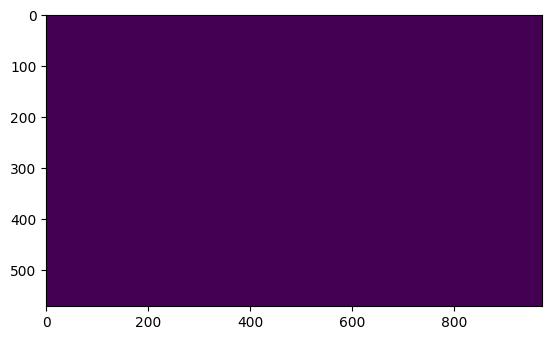

In [44]:
plt.imshow(diff)

In [45]:
mse = mean_squared_error(image_gray, image_gray)
mse

np.float64(0.0)

# Статистические характеристики изображений

In [46]:
mean = image_gray.mean()

In [47]:
std = image_gray.std()

In [48]:
print(mean,std)

67.39845601010899 52.02781963536845


In [49]:
eq_gray = cv2.equalizeHist(image_gray)

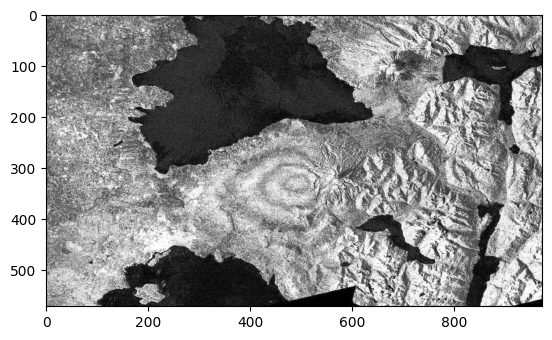

In [50]:
plt.imshow(eq_gray, cmap="gray")


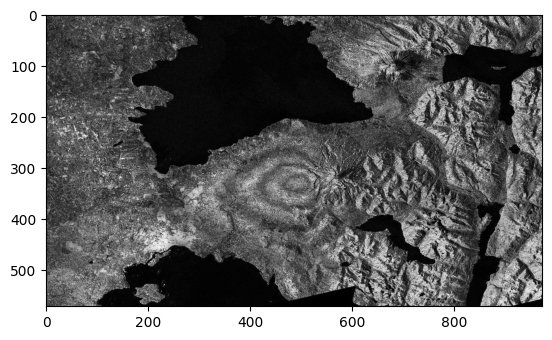

In [51]:
plt.imshow(image_gray, cmap="gray")

In [52]:
# 1. Загрузите изображение в оттенках серого sar_1_gray.jpg. 
# 2. постройте гистограмму
# 3. реализуйте алгоритм гамма коррекции с параметром гамма <1, >1.
# 4. Сравните исходное изображение, скорректированное при помощи гамма-фильтра. MSE, SSIM.
# 5. реализуйте алгоритм статистической цветокоррекции на основе статистики eq_gray.
# 6. Протестируйте работу алгоритмов пороговой фильтрации с различными параметрами.
# Для каждого решения - напечатайте результат


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity, mean_squared_error

In [3]:
image_gray = cv2.imread('sar_1_gray.jpg', cv2.IMREAD_GRAYSCALE)

Text(0.5, 1.0, 'Гистограмма исходного изображения')

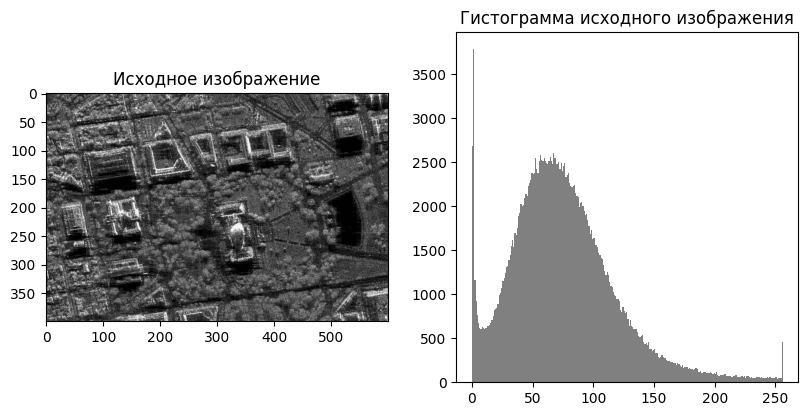

In [14]:
plt.figure(figsize=(15, 10))
    
plt.subplot(2, 3, 1)
plt.imshow(image_gray, cmap='gray')
plt.title('Исходное изображение')

    
plt.subplot(2, 3, 2)
plt.hist(image_gray.ravel(), bins=256, range=[0, 256], color='gray', alpha=1)
plt.title('Гистограмма исходного изображения')


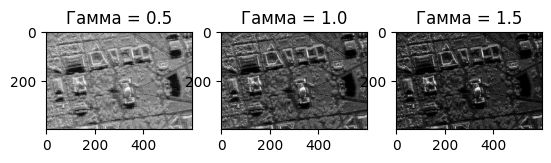

In [5]:
def gamma_correction(image, gamma=1.0):
    image_normalized = image.astype(np.float32) / 255.0
    corrected = np.power(image_normalized, gamma)
    return (corrected * 255).astype(np.uint8)

gamma_values = [0.5, 1.0, 1.5]
gamma_images = []
    
for i, gamma in enumerate(gamma_values):
    gamma_img = gamma_correction(image_gray, gamma)
    gamma_images.append(gamma_img)
        
    plt.subplot(2, 3, i+1)
    plt.imshow(gamma_img, cmap='gray')
    plt.title(f'Гамма = {gamma}')

plt.show()

In [11]:
for i, gamma in enumerate(gamma_values):
    if gamma != 1.0:  
        mse = mean_squared_error(image_gray, gamma_images[i])
            
        min_dim = min(image_gray.shape)
        win_size = min(7, min_dim if min_dim % 2 == 1 else min_dim - 1)           
        ssim = structural_similarity(image_gray, gamma_images[i], 
                                      win_size=win_size, 
                                      data_range=255)        
        print(f"Гамма = {gamma}")
        print(f"  MSE = {mse}")
        print(f"  SSIM = {ssim}")

Гамма = 0.5
  MSE = 3250.429145833333
  SSIM = 0.7875008686792753
Гамма = 1.5
  MSE = 971.8206541666667
  SSIM = 0.8065788107754002


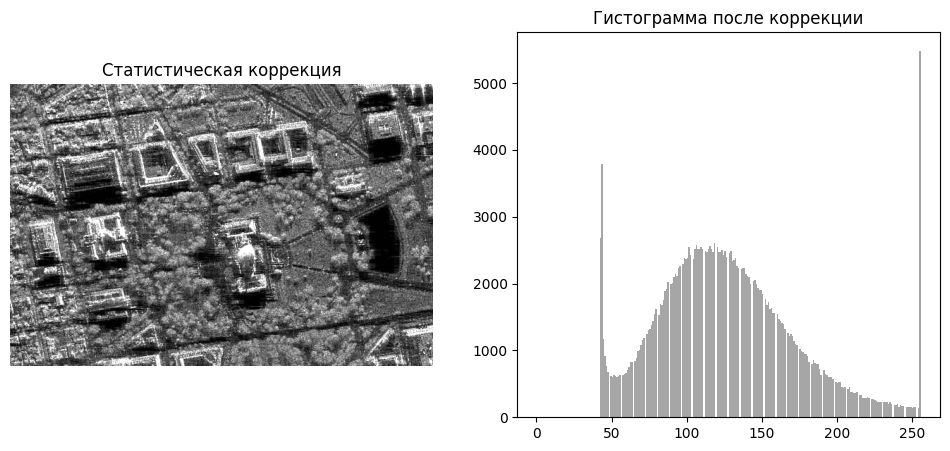

MSE = 2723.1328708333335
SSIM = 0.8227000439109768


In [15]:
def statistical_correction(image, target_mean=128, target_std=50):
    current_mean = np.mean(image)
    current_std = np.std(image)
        
    corrected = (image - current_mean) * (target_std / current_std) + target_mean
    corrected = np.clip(corrected, 0, 255)        
    return corrected.astype(np.uint8)

stat_corrected = statistical_correction(image_gray)
    
plt.figure(figsize=(12, 5))
    
plt.subplot(1, 2, 1)
plt.imshow(stat_corrected, cmap='gray')
plt.title('Статистическая коррекция')
plt.axis('off')
    
plt.subplot(1, 2, 2)
plt.hist(stat_corrected.ravel(), bins=256, range=[0, 256], color='gray', alpha=0.7)
plt.title('Гистограмма после коррекции')

plt.show()

mse_stat = mean_squared_error(image_gray, stat_corrected)
ssim_stat = structural_similarity(image_gray, stat_corrected, 
                                   win_size=win_size, 
                                   data_range=255)
print(f"MSE = {mse_stat}")
print(f"SSIM = {ssim_stat}")

Порог 100: 23.2% белых пикселей
Порог 128: 10.1% белых пикселей
Порог 150: 5.5% белых пикселей
Порог 180: 2.6% белых пикселей


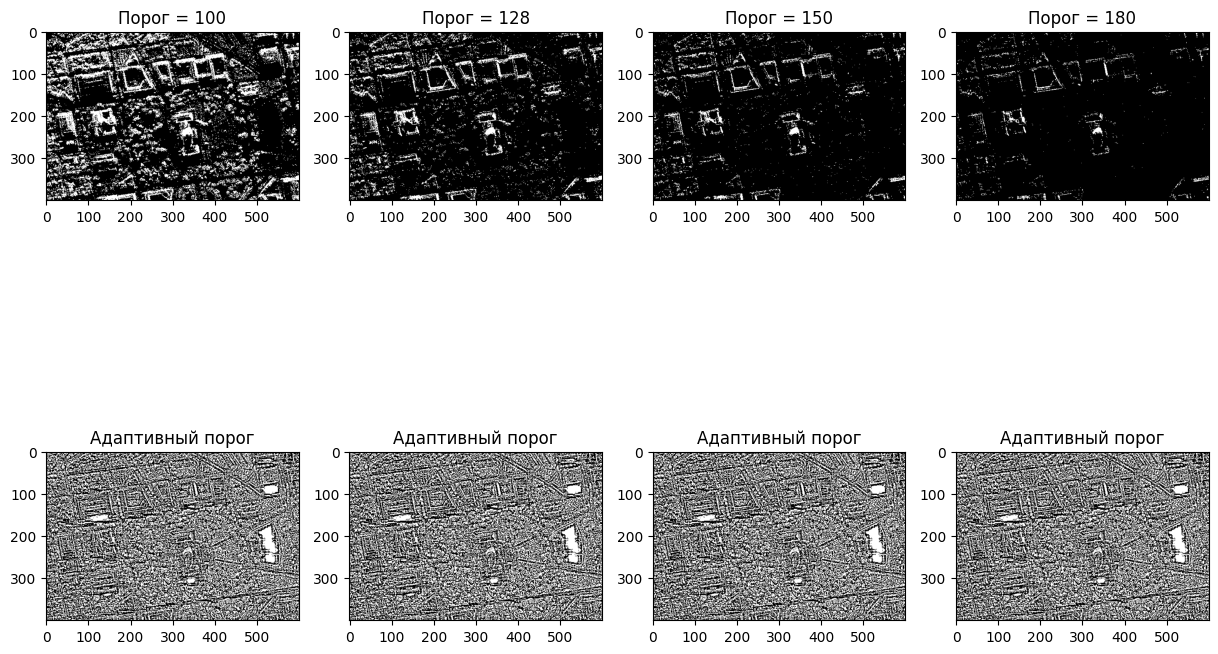

In [18]:
threshold_values = [100, 128, 150, 180]
    
plt.figure(figsize=(15, 10))
    
for i, threshold in enumerate(threshold_values):
    retval, binary = cv2.threshold(image_gray, threshold, 255, cv2.THRESH_BINARY)
        
    adaptive = cv2.adaptiveThreshold(image_gray, 255, 
                                    cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
                                    cv2.THRESH_BINARY, 11, 2)      
    plt.subplot(2, 4, i+1)
    plt.imshow(binary, cmap='gray')
    plt.title(f'Порог = {threshold}')

        
    plt.subplot(2, 4, i+5)
    plt.imshow(adaptive, cmap='gray')
    plt.title(f'Адаптивный порог')

    white_pixels = np.sum(binary == 255)
    total_pixels = binary.size
    white_percentage = (white_pixels / total_pixels) * 100
    
    print(f"Порог {threshold}: {white_percentage:.1f}% белых пикселей")

plt.show()